# <center>DELAY AND SUM ALGORITHM</center>

## SECTION-A : CODE

In [334]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

In [335]:
 # Main system parameters: number of mics, number of samples in time
Nmics=64
Nsamp=200

# Source: x,y coordinates: x: 0+, y: [-Y, +Y] where Y determined by pitch and Nmics
src = (0, 0)

# Spacing between microphones
pitch = 0.1

# proxy for sampling rate
dist_per_samp = 0.1

# Speed of sound in the medium
C = 2.0

# Time dilation factor for sinc pulse: how narrow
SincP = 5.0

# Location of point obstacle
obstacle = (3, -1)

In [336]:
 # Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
    d1 = ((pt[1]-src[1])*(pt[1]-src[1])+(pt[0]-src[0])*(pt[0]-src[0]))**0.5# CODE distance from src to pt
    d2 = ((pt[1]-mic)**2+(pt[0])**2)**0.5 # CODE distance from pt to mic
    return d1 + d2
# Source sound wave - time axis and wave
# sinc wave with narrowness determined by parameter
def wsrc(t):
    return np.sinc(SincP*t)

In [337]:
# CODE Locations of microphones
mics=[]
#If number of microphones is even ONLY CASE 
if Nmics%2==0:
    #Starting from the mic at the top of Y-axis and going down
    for i in range(0,int(Nmics/2)):
        mics.append((int(Nmics/2)-i-1)*pitch+pitch/2)
    for i in range(0,int(Nmics/2)):    
        mics.append(-i*pitch-pitch/2)      

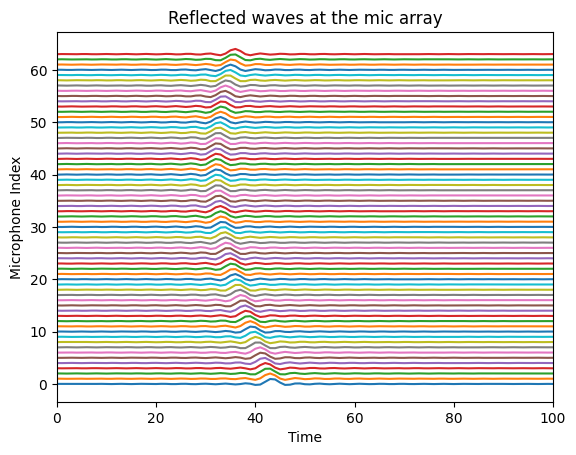

In [338]:

t = [] # CODE Nsamp time instants with spacing of dist_per_samp
for i in range(Nmics):
    t.append(dist((0,0),(obstacle[0],obstacle[1]),mics[i])/C)
reflected_waves = np.zeros((Nmics, Nsamp))  

count=0
for i in t:
    x=np.linspace(0,0.1*Nsamp-1,Nsamp)
    r=[]
    p=[]
    p.append(wsrc(-i))
    ct=0
    for j in x:
        r.append(wsrc(j-i)+count)
        reflected_waves[count,ct]=wsrc(j-i)
        ct=ct+1 
    count=count+1
    plt.plot(r)
    
plt.xlim(0,100)    
plt.xlabel('Time')
plt.ylabel('Microphone Index')
plt.title('Reflected waves at the mic array')
plt.show()    
    


Text(0.5, 1.0, 'Heatmap')

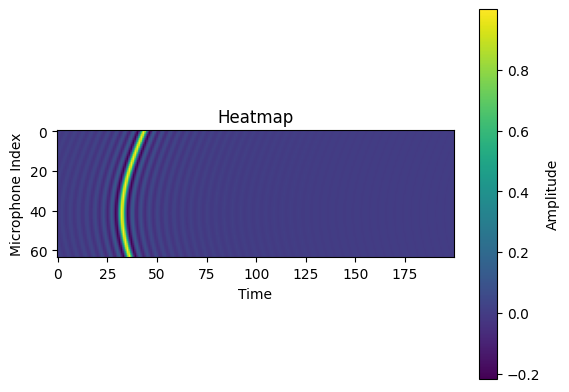

In [339]:

# Plot the heatmap
plt.imshow(reflected_waves, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time')
plt.ylabel('Microphone Index')
plt.title('Heatmap')

In [340]:
max=0
total_waves = np.zeros((Nmics,int( Nsamp))) 
for i in range(1,int(Nsamp)):
    count=0
    for j in mics:
        sum=0
        count=count+1
        for k in range(0,Nmics):
            x=dist((0,0),(i*dist_per_samp,j),mics[k])/C
            if x<=Nsamp*dist_per_samp:
                sum=sum+reflected_waves[k,int(x/(dist_per_samp))]
            else:
                pass
                
        total_waves[64-count][i-1]=sum       
        #print(sum)
        if sum>max:
            posx=i/10
            posy=j
            max=sum
            
print(f'X-coordinate of object={posx}')        
print(f'Y-coordinate of object={posy}')
print(f'The obtained maxima={max}')

X-coordinate of object=3.2
Y-coordinate of object=-1.05
The obtained maxima=60.13852060905786


Text(0.5, 1.0, 'Heatmap')

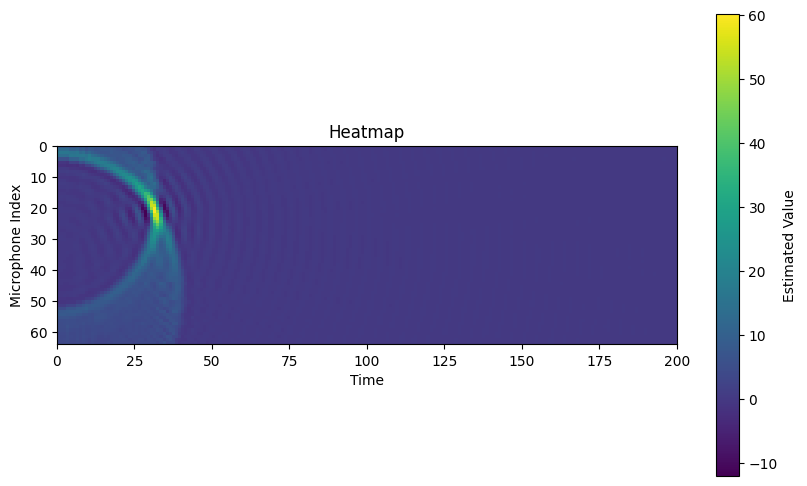

In [343]:
# Plot the heatmap

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the heatmap with colorbar whowing degree of variation vs Amplitude
im = ax.imshow(total_waves, cmap='viridis', extent=[0, Nsamp, Nmics,0])
plt.colorbar(im, label='Estimated Value')
plt.xlabel('Time')
plt.ylabel('Microphone Index')
plt.title('Heatmap')

##  SECTION-B : QUESTIONS

### QUESTION-1 

*QUESTION: The plots below show two example sinc pulses. How will you generate pulses that look
like this? Which parameter should be changed? What effect do you think this will have on the final
image?*

The parameter that controls the shape of the sinc() function is **SincP**.


To get sinc(t) we can proceed by using either the np.sinc() function in python or we can use the formula of sinc function which is

$$
sinc(t)= \frac{sin(t)}{t}
$$

Here we get a continuous graph by sampling  the value at multiple time instants.
Greater the Value of SincP the faster the sinc() funtion dies down because it has almost **reciprocal relation** with the sinc() function

$$
sinc(SincP*t)=\frac {sin(SincP*t)}{SincP*t}
$$

Also the frequency (eventhough it is not periodic) increases with increase in SincP.

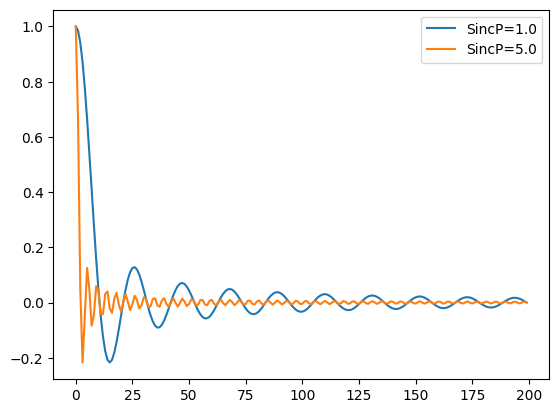

In [342]:
SincP=1.0
x=np.linspace(0,0.1*Nsamp-1,Nsamp)
r=[]
for j in x:
    r.append(wsrc(j))
plt.plot(r,label='SincP=1.0')  
SincP=5.0
r=[]
for j in x:
    r.append(wsrc(j))
plt.plot(r,label='SincP=5.0')  
plt.legend()

### QUESTION-2

*QUESTION : Does it make sense to reconstruct up toNsamp? What value is more reasonable
as an upper limit for the x-axis here?*

While the sinc function theoretically extends to infinity, in practice, **its values become very small as you move away from the central peak**. Choosing an upper bound that **covers the significant portion of the sinc function** can be reasonable.

In the context of the Nyquist theorem, it suggests that to accurately capture and reconstruct a signal, the sampling rate should be at least twice the highest frequency present in the signal. In your case, if your signal is a sinc function, it has a main lobe width that is inversely proportional to its duration. By choosing Nsamp/2 as an upper limit, you are ensuring that you cover the main lobe and some portion of the side lobes.


**Thus Nsamp/2 is a reasonable upper bound for the given distribution.**

### QUESTION-3

*QUESTION : The (x, y) coordinates corresponding to the maximum amplitude (yellow colour) is approximately
(30, 22). Explain why this is the correct expected position for the given obstacle.*

**(30, 22) is the position of the object as shown in the graph from our Delay and Sum Algorithm.**

This is because the position 30 in the x-axis of the heatmap corresponds to
$$30 * distance per sample  = 30 * 0.1 = 3.$$

As we see, our X-coordinate for the position of the obstacle is 3 in the given initial conditions.

The position of the Y-coordinate in the actual grid is based on the formula:
$$
 y = \frac{pitch}{2} + \left(\frac{Nmics}{2} - \text{MicrophoneIndex} - 1\right) \times \text{pitch} 
$$
Now, based on the heatmap, we get that our microphone index of the coordinates of the obstacle is 22. But this is if we start from the 64th microphone. So our exact microphone index is \( 64 - 22 \).

Given:
- pitch = 0.1
- Nmics = 64 
- Microphone Index= 64-22=42
$$
 y   = \frac{0.1}{2} + \left(\frac{64}{2} - 42 - 1\right) \times 0.1
     = 0.05 + (-11) \times 0.1 
     = -1.05
$$

This is the Y-coordinate of the position of the obstacle in the given initial conditions.

**Thus (30,22) in the heat map corresponds to (3,-1.05) in the x,y plane which is the position of the obstacle**


### QUESTION-4


*QUESTION : What is the maximum obstacle x- and y- coordinate that you can use and still have an image
reconstructed?*

The maximum possible coordinates of the object are:


**For X-Coordinate:**

Maximum X-coordinate possible = xmax
$$
x_(max) =\frac{Nsamp}{2}*distancepersamp
      = \frac{200}{2}*0.1
      = 100*0.1
      = 10
$$

Because we have to ensure that we are able to sample till it starts from source and reaches the microphone. That is roughly twice the distance between source and obstacle point.
Thus the maximum x- coordinate will be half of the maximum distance that can be traversed while sampling.
 
 
**For Y-Coordinate:** 


Range of Y- coordinate is lying in the range of values of the y-coordinate of the microphones
That is
$$
ymin = - \frac{Nmics+1}{2}*pitch
     = -\frac{64+1}{2}*0.1
     =-3.25
$$
$$
ymax =  \frac{Nmics+1}{2}*pitch
     = \frac{64+1}{2}*0.1
     = 3.25
$$
 


### QUESTION-5

*QUESTION:What happens if C is different - if C is decreased it looks like the image becomes sharper. Can you
explain why intuitively?*

Since the **time per sample has reciprocal relation with the velocity of sound(C).**

As the  **time interval  between sampling  decreases we are able to make a more correct approximation** of the position of the object.
Thus this results in a sharper image due to higher contrast in the heatmap colours.

**So with decrease in C the time interval between sampling increases and this results in a less resolution image.But since there is a decrease in the resolution of the image there is an increase in sharpness**

### QUESTION-6

*QUESTION: What happens if Nmics is increased or decreased?*

As you can see from the images attached in the report, once the **number of mics decreases the resolution of the heatmap decreases**. Same way once the number of samples decreases the resolution of the image decreases.


Conversely, once the **number of mics increases the resolution of the image increases**

Thus **Resolution of Image is directly proportional to the Number of microphones and the Number of Samples.**